# 文末表現のユーザ毎の使用回数測定

**作成者**: 白鳥 佑弥(yuya.shiratori@access-company.com)

## 目標

草、芝（w）、笑のユーザごとの使用回数を数える。

## 対象となる表現

* 草
    * 草
* 芝
    * w, ww, www, ...
* 笑
    * 笑

------

In [1]:
import numpy as np
import pandas as pd
import MeCab
from matplotlib import pyplot as plt

『タコピーの原罪』でまずは試してみる。

In [2]:
df_comments_takopi = pd.read_csv("./data/comments_takopi.csv")

In [3]:
df_comments_takopi_contains_kusa = df_comments_takopi\
    .loc[lambda df: df.message.str.contains("草")]

*草*が末尾にないパターンを探す。

In [4]:
df_comments_takopi_not_ending_kusa = df_comments_takopi_contains_kusa\
    .loc[lambda df: df.message.str.contains('草\S', regex=True)]
df_comments_takopi_not_ending_kusa.index.size

151

MeCab で*草*の次の形態素を調べてみる。

In [5]:
tagger = MeCab.Tagger()
tagger.parse('') # avoiding bugs

'EOS\n'

In [6]:
def next_word_of(sentence: str, word: str):
    node = tagger.parseToNode(sentence)
    while node:
        if word in node.surface:
            return pd.Series(data={
                'surface': node.next.surface,
                'feature': node.next.feature
            })
        node = node.next

In [7]:
df_comments_takopi_not_ending_kusa.message\
    .apply(next_word_of, args=("草",))\
    .groupby("surface")\
    .count()

,feature
surface,
,1
(,4
),1
W,1
w,5
ww,1
www,1
wwwwwwwwww,1
…,2


*草*の正規表現

In [8]:
kusa_regex = "草(?=[…、。\swWｗＷ()]|$)"

In [9]:
df_comments_takopi_ending_kusa = df_comments_takopi\
    .loc[lambda df: df.message.str.contains(kusa_regex, regex=True)]

In [10]:
df_comments_takopi_ending_kusa\
    .loc[lambda df: df.message.str.contains("草\S", regex=True)]

,content_id,user_id,inserted_at,like_count,message
4299,1018886,2030259,2021-12-16 16:37:44,3,激重のゲロゲロで草。
5960,1018886,1808726,2021-12-18 00:50:34,0,胸糞悪すぎて草。マグちゃんみたいなことやりたいのか知らんが、テーマ重いのに絡めすぎ。
7465,1019782,1171728,2021-12-23 22:44:09,1,まるで今までが急展開じゃなかったみたいな書き方で草。\n今までの急展開から更に急展開になった...
11192,1019854,44371022,2021-12-30 23:48:02,4,更新される度に前より更に重くて…草…
11905,1019854,102681373,2021-12-31 05:18:06,0,重すぎて草、なんやこれ
11924,1019854,40634258,2021-12-31 05:32:59,2,安定の地獄で草w
12397,1019854,100025644,2021-12-31 13:57:11,2,普通に職業に対する偏見ありすぎで草。
13516,1020285,31960913,2022-01-06 15:07:00,1,人殺したのにちょっとコミカルになってて草。
13932,1020285,36052942,2022-01-06 15:21:53,1,だからタッセルってなんだよは草。
14246,1020285,43339560,2022-01-06 15:43:31,0,｢東くんしかいないの助けて｣にキュンして協力者なって草。チャッピー 🐕 生き返ってこないだと…


他の例も試す。

In [11]:
warai_regex = "笑(?=[…、。\swWｗＷ()]|$)"

In [12]:
df_comments_takopi_ending_warai = df_comments_takopi\
    .loc[lambda df: df.message.str.contains(warai_regex, regex=True)]

df_comments_takopi_ending_warai

,content_id,user_id,inserted_at,like_count,message
185,1018491,35151354,2021-12-09 15:10:21,0,重いわ！笑\nタコピー頼む！
268,1018491,40045976,2021-12-09 15:13:53,0,人のもので死ぬな笑
530,1018491,41283880,2021-12-09 15:29:09,0,しゃあなしで読んだらめっちゃおもろくっってびびった(笑)
660,1018491,38728047,2021-12-09 15:43:50,0,タイムリープものは\nあー、鬱な展開になりそう…笑
872,1018491,18616,2021-12-09 16:21:16,5,おやすみぷんぷんっぽいやって思ったらそのコメントあった笑
...,...,...,...,...,...
84197,1018886,105537450,2022-03-31 04:50:24,0,いやしずかちゃん悪ないやん笑笑。他の子を巻き添いにするなまりな、後どんなに家庭環境が悪くても...
84199,1019782,105537450,2022-03-31 04:53:30,1,あたしイッヌ飼ってるんでメンタルクソほどやられた。まりな、さすがにイッヌを巻き込むのは違くな...
84201,1020285,105537450,2022-03-31 04:58:59,0,東着いてくんのきっしょ！笑笑まりなは永久ほぞーん(*-`ω´-)９ ﾖｯｼｬｧ!!笑笑
84210,1020285,35558434,2022-03-31 05:40:20,0,東くん！！！笑


芝も試す。

In [13]:
shiba_regex = "[wWｗＷ]+(?=[…、。\s()]|$)"

In [14]:
from src.filterdf import filter_by_regex

In [15]:
df_comments_takopi_ending_shiba = filter_by_regex(df_comments_takopi, "message", shiba_regex)
df_comments_takopi_ending_shiba

,content_id,user_id,inserted_at,like_count,message
492,1018491,35047622,2021-12-09 15:26:53,0,タコピーリベンジャーズwwwww
557,1018491,1748168,2021-12-09 15:32:07,1,面白い、けど少年というか子供向けじゃないなwww
637,1018491,815208,2021-12-09 15:41:16,1,重すぎだろw
663,1018491,101730822,2021-12-09 15:44:26,1,めっちゃ好きだし、今後が楽しみだけど、思った以上に重くてめっちゃしんどかったw
814,1018491,100368402,2021-12-09 16:10:52,0,キーくんヒヨコじゃないッピ〜！\n\nの声で脳内再生されたw
...,...,...,...,...,...
83958,1020348,39487590,2022-03-29 11:51:03,0,なんかキラキラしたコマの次は身構えちゃうw
84049,1023571,105086611,2022-03-30 04:31:47,0,メイド・イン・ヘブン使っちゃた系のやつすか?w
84072,1021591,105986615,2022-03-30 07:51:34,1,草W W W W W W W W W W W W W W \nやっぱそうきますよね
84177,1020285,39750882,2022-03-31 02:23:00,1,この漫画の親はまともな奴おらんのかw


------

## 次なる方針

特徴的な文末表現をしているコメント群を取り出すことができた。
これを、ユーザ毎にグループ化する。

In [16]:
df_comments_takopi_ending_kusa[['user_id', 'message']].groupby('user_id').count().sort_values(by='message', ascending=False)

,message
user_id,
45364808,3
103975803,2
41364870,2
40634258,2
102662822,2
...,...
36748565,1
36751708,1
36808736,1


In [17]:
df_comments_takopi_ending_kusa.loc[lambda df: df.user_id == 45364808]

,content_id,user_id,inserted_at,like_count,message
19692,1020348,45364808,2022-01-18 22:41:24,2,読むのが辛いコメント偽善コメントで草\n嫌なら読まなければ良い
22711,1018886,45364808,2022-01-22 07:47:28,5,ネットリンチ大好きな生き物(人間)がいじめ良くないとか言ってるの草
23053,1019782,45364808,2022-01-25 03:39:35,4,話の冒頭にチラッとクラスメイトがうつってるけど東くん以外皆んな嫌悪感丸出しの目でしずかちゃん...


In [18]:
df_comments_takopi_ending_warai[['user_id', 'message']].groupby('user_id').count().sort_values(by='message', ascending=False)

,message
user_id,
104559279,4
104281653,4
39479230,3
104138927,3
105537450,3
...,...
35257144,1
35163691,1
35151354,1


In [19]:
df_comments_takopi_ending_warai.loc[lambda df: df.user_id == 104559279]

,content_id,user_id,inserted_at,like_count,message
16881,1020285,104559279,2022-01-11 08:33:23,3,これ、めちゃくちゃ面白い笑笑\n
26984,1021591,104559279,2022-01-28 04:22:08,1,今日も面白かったっピ！笑笑
49250,1023979,104559279,2022-02-24 22:21:25,0,ちょっとむずいねー笑笑
80020,1026387,104559279,2022-03-25 01:26:25,1,ありがとうっピ笑笑


In [20]:
df_comments_takopi.loc[lambda df: df.user_id == 104281653]

,content_id,user_id,inserted_at,like_count,message
4789,1018886,104281653,2021-12-16 22:36:29,0,はーこんな学校じゃなくて良かった〜〜っ笑
6277,1018886,104281653,2021-12-23 11:57:32,3,キララザカって苗字？？五度見した笑
7723,1019782,104281653,2021-12-24 02:11:29,14,まりなちゃん1体1で呼び出してるだけマシだよな\nいじめっ子って大体1人で行動できないじゃん
8459,1019782,104281653,2021-12-29 09:59:33,2,自分は学校っていう場所から解放されて何年も経ってる年齢だから余裕で読めるけど、、\n小学生中...
13141,1019854,104281653,2022-01-06 00:38:27,1,面白くなってまいりました
16162,1020285,104281653,2022-01-07 11:29:08,2,やっぱメガネ君もヤベエ奴だったか笑笑
16972,1020285,104281653,2022-01-12 14:13:54,4,ガチで救いがないから面白いんだよなあ\nぬるい漫画には飽きた\n


In [21]:
df_comments_takopi_ending_shiba[['user_id', 'message']].groupby('user_id').count().sort_values(by='message', ascending=False)

,message
user_id,
45364808,20
36619382,8
24290508,6
103746555,5
39982230,4
...,...
36841828,1
36855699,1
36886480,1


In [22]:
df_comments_takopi_ending_shiba.loc[lambda df: df.user_id == 45364808]

,content_id,user_id,inserted_at,like_count,message
7786,1018491,45364808,2021-12-24 03:03:13,1,めちゃくちゃ面白いなwwww\n絶対人気出るぞこれwww\n
8323,1018886,45364808,2021-12-25 13:08:08,3,このコメ欄ではまりなちゃんの親父さんのいじめが発生してるね。\nいじめても良いと思ってる人は...
12563,1019782,45364808,2022-01-01 00:18:17,1,何回繰り返そうが人間の本質は変わることがない\nいじめも良くないって認識がありながらどこかで...
15226,1020285,45364808,2022-01-06 22:53:10,0,タコピー善すぎてやべぇんだがww\nただの憶測だけど、もしかしてタコピーの悪意の塊バージョン...
16466,1018886,45364808,2022-01-08 03:00:37,0,いじめた側が100悪いんだあw\nそうなんだねw\nじゃあいじめ加害者を全国民で袋叩きにする...
18593,1018886,45364808,2022-01-13 23:08:27,1,まりなちゃんのアンチ？\nいじめはダメなんじゃないの？\n理由があってもいじめちゃダメなんで...
21516,1021156,45364808,2022-01-20 22:04:57,3,おーい コメ欄のみんな\nまりなちゃんが死んでよかったと言ってた人へ\n母親の気持ち考えてた...
22944,1018886,45364808,2022-01-23 12:55:35,1,まりなちゃんはきっと精神状態が普通じゃないんだな\n私の近所にもそういう人がいて迷惑してるw...
27231,1018886,45364808,2022-01-28 08:22:42,3,いじめる方を救えばいじめが無くなる？\n何言ってるの？w\nそんな時代遅れの解決法で無くなる...
31227,1021912,45364808,2022-02-03 23:26:06,0,物を数えるだけの問題が出るテストなんて100点沢山いそうなんだが、、ww\n\n


それぞれの表現をするユーザ数（重複あり）を調べる。

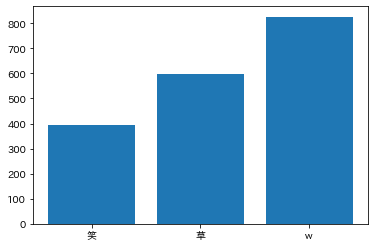

コメントしたユーザの人数：41076


In [23]:
comment_kinds = ['笑', '草', 'w']
users_count_by_comment_kind = [
    df_comments_takopi_ending_warai['user_id'].nunique(),
    df_comments_takopi_ending_kusa['user_id'].nunique(),
    df_comments_takopi_ending_shiba['user_id'].nunique(),
]

plt.bar(comment_kinds, users_count_by_comment_kind)
plt.show()

users_count = df_comments_takopi['user_id'].nunique()
print(f'コメントしたユーザの人数：{users_count}')

------

## 他の作品における文末表現の分布

各作品において、特定の文末表現をするユーザの分布を調べる。

In [24]:
df_comments = pd.read_csv("./data/comments.csv")
df_comments_all = pd.concat([df_comments_takopi, df_comments], ignore_index=True, axis=0)
df_comments_all

,content_id,user_id,inserted_at,like_count,message
0,1018491,104213855,2021-12-09 15:01:22,1,一緒に学校って…友達にみられるかもよ…
1,1018491,25578786,2021-12-09 15:01:22,0,1コメ
2,1018491,37901858,2021-12-09 15:01:25,0,すごいのがはじまった！金曜日激戦に。。
3,1018491,2113182,2021-12-09 15:01:29,0,シンプルに好き
4,1018491,899352,2021-12-09 15:02:13,10001,面白いけど流石にエグすぎるかも...!
...,...,...,...,...,...
185449,1026940,1848537,2022-03-31 09:27:27,0,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…
185450,1025345,105935471,2022-03-31 09:47:30,0,雷(トニト)一閃は草
185451,1026940,812330,2022-03-31 10:18:28,0,ジジは何食べてそんなにデカくなったんだ
185452,1016995,105982740,2022-03-31 10:23:10,0,最高だわ…


コンテンツと ID とを紐付ける。

In [25]:
df_contents_takopi = pd.read_csv("./data/contents_takopi.csv")
df_contents = pd.read_csv("./data/contents.csv")
df_contents_all = pd.concat([df_contents_takopi, df_contents], ignore_index=True, axis=0)

df_all = pd.merge(df_comments_all, df_contents_all, on='content_id')
df_all

,content_id,user_id,inserted_at,like_count_x,message,work_id,work_name,content_name,author_names,view_count,favorite_count,like_count_y,publish_begin_at,comment_count,export_date,backnum
0,1018491,104213855,2021-12-09 15:01:22,1,一緒に学校って…友達にみられるかもよ…,107202,タコピーの原罪,[第1話]タコピーの原罪,タイザン5,7607295,573950,1960982,2021-12-09 15:00:00,4862,2022-03-31 11:07:27+00,NaN
1,1018491,25578786,2021-12-09 15:01:22,0,1コメ,107202,タコピーの原罪,[第1話]タコピーの原罪,タイザン5,7607295,573950,1960982,2021-12-09 15:00:00,4862,2022-03-31 11:07:27+00,NaN
2,1018491,37901858,2021-12-09 15:01:25,0,すごいのがはじまった！金曜日激戦に。。,107202,タコピーの原罪,[第1話]タコピーの原罪,タイザン5,7607295,573950,1960982,2021-12-09 15:00:00,4862,2022-03-31 11:07:27+00,NaN
3,1018491,2113182,2021-12-09 15:01:29,0,シンプルに好き,107202,タコピーの原罪,[第1話]タコピーの原罪,タイザン5,7607295,573950,1960982,2021-12-09 15:00:00,4862,2022-03-31 11:07:27+00,NaN
4,1018491,899352,2021-12-09 15:02:13,10001,面白いけど流石にエグすぎるかも...!,107202,タコピーの原罪,[第1話]タコピーの原罪,タイザン5,7607295,573950,1960982,2021-12-09 15:00:00,4862,2022-03-31 11:07:27+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185449,1026940,102890807,2022-03-31 08:50:27,0,お湯をかければ元に戻るのは らんまリスペクトかな,102085,ダンダダン,[第50話]ダンダダン,龍幸伸,1169988,735666,1176762,2022-03-28 15:00:00,2408,2022-03-31 10:35:20+00,1.0
185450,1026940,38473504,2022-03-31 08:55:59,0,えぇーーー,102085,ダンダダン,[第50話]ダンダダン,龍幸伸,1169988,735666,1176762,2022-03-28 15:00:00,2408,2022-03-31 10:35:20+00,1.0
185451,1026940,1848537,2022-03-31 09:27:27,0,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…,102085,ダンダダン,[第50話]ダンダダン,龍幸伸,1169988,735666,1176762,2022-03-28 15:00:00,2408,2022-03-31 10:35:20+00,1.0
185452,1026940,812330,2022-03-31 10:18:28,0,ジジは何食べてそんなにデカくなったんだ,102085,ダンダダン,[第50話]ダンダダン,龍幸伸,1169988,735666,1176762,2022-03-28 15:00:00,2408,2022-03-31 10:35:20+00,1.0


In [26]:
all_ending_regex = "(?:草|笑|[wWｗＷ]+)(?=[…、。\s()]|$)"
df_ending_all = filter_by_regex(df_all, "message", all_ending_regex)
df_ending_all[['content_id', 'user_id', 'message']]

,content_id,user_id,message
57,1018491,44805937,可愛いおもえもんで草
185,1018491,35151354,重いわ！笑\nタコピー頼む！
268,1018491,40045976,人のもので死ぬな笑
492,1018491,35047622,タコピーリベンジャーズwwwww
530,1018491,41283880,しゃあなしで読んだらめっちゃおもろくっってびびった(笑)
...,...,...,...
185403,1026940,34545074,やぱぱーやぱぱーいーしゃんてんはワロタ\nやっぱらんま意識したかwww
185424,1026940,1269270,毎回、突っ込むところが多すぎて大変なんだが？w
185427,1026940,31643626,やっぱりらんま1/2じゃねーか！！www
185431,1026940,1661037,やぱぱーやぱぱーいーしゃんてんwww


In [27]:
df_ending_all_detailed = df_ending_all.assign(\
    comment_ending_kusa=lambda df: df.message.str.contains(kusa_regex, regex=True),\
    comment_ending_warai=lambda df: df.message.str.contains(warai_regex, regex=True),\
    comment_ending_shiba=lambda df: df.message.str.contains(shiba_regex, regex=True))
df_ending_all_detailed[['content_id', 'user_id', 'message', 'comment_ending_kusa', 'comment_ending_warai', 'comment_ending_shiba']]

,content_id,user_id,message,comment_ending_kusa,comment_ending_warai,comment_ending_shiba
57,1018491,44805937,可愛いおもえもんで草,True,False,False
185,1018491,35151354,重いわ！笑\nタコピー頼む！,False,True,False
268,1018491,40045976,人のもので死ぬな笑,False,True,False
492,1018491,35047622,タコピーリベンジャーズwwwww,False,False,True
530,1018491,41283880,しゃあなしで読んだらめっちゃおもろくっってびびった(笑),False,True,False
...,...,...,...,...,...,...
185403,1026940,34545074,やぱぱーやぱぱーいーしゃんてんはワロタ\nやっぱらんま意識したかwww,False,False,True
185424,1026940,1269270,毎回、突っ込むところが多すぎて大変なんだが？w,False,False,True
185427,1026940,31643626,やっぱりらんま1/2じゃねーか！！www,False,False,True
185431,1026940,1661037,やぱぱーやぱぱーいーしゃんてんwww,False,False,True


In [28]:
df = df_ending_all_detailed[['work_id', 'work_name', 'user_id', 'comment_ending_kusa', 'comment_ending_warai', 'comment_ending_shiba']]\
    .groupby('user_id', as_index=False)\
    .value_counts()
df

,user_id,work_id,work_name,comment_ending_kusa,comment_ending_warai,comment_ending_shiba,count
0,1016,530,左ききのエレン,False,False,True,1
1,3042,102085,ダンダダン,False,False,True,1
2,4010,102085,ダンダダン,False,False,True,1
3,5298,107202,タコピーの原罪,False,False,True,1
4,18616,107202,タコピーの原罪,False,True,False,2
...,...,...,...,...,...,...,...
9700,105935471,1303,SPY×FAMILY,True,False,False,1
9701,105941781,107202,タコピーの原罪,False,False,True,1
9702,105959475,1303,SPY×FAMILY,False,False,True,1
9703,105986615,107202,タコピーの原罪,False,True,False,1


笑いの文末表現をコメントしたユーザ総数を数える。

In [29]:
df.user_id.nunique()

8236

In [30]:
df_ending_all_detailed[['work_name', 'comment_ending_kusa', 'comment_ending_warai', 'comment_ending_shiba']]\
    .groupby('work_name', as_index=False)\
    .sum()

,work_name,comment_ending_kusa,comment_ending_warai,comment_ending_shiba
0,SPY×FAMILY,503,1002,2152
1,タコピーの原罪,630,435,947
2,ダンダダン,503,846,1848
3,左ききのエレン,37,114,209
4,怪獣８号,327,398,640
5,阿波連さんははかれない,97,71,228
6,鴨乃橋ロンの禁断推理,26,76,137


In [31]:
df_all_detailed = df_all.assign(\
    comment_ending_kusa=lambda df: df.message.str.contains(kusa_regex, regex=True),\
    comment_ending_warai=lambda df: df.message.str.contains(warai_regex, regex=True),\
    comment_ending_shiba=lambda df: df.message.str.contains(shiba_regex, regex=True))
df_all_detailed = df_all_detailed.assign(\
    comment_ending=lambda df: df.comment_ending_kusa * 4 + df.comment_ending_warai * 2 + df.comment_ending_shiba)
df_all_detailed[['content_id', 'user_id', 'message', 'comment_ending_kusa', 'comment_ending_warai', 'comment_ending_shiba', 'comment_ending']]

,content_id,user_id,message,comment_ending_kusa,comment_ending_warai,comment_ending_shiba,comment_ending
0,1018491,104213855,一緒に学校って…友達にみられるかもよ…,False,False,False,0
1,1018491,25578786,1コメ,False,False,False,0
2,1018491,37901858,すごいのがはじまった！金曜日激戦に。。,False,False,False,0
3,1018491,2113182,シンプルに好き,False,False,False,0
4,1018491,899352,面白いけど流石にエグすぎるかも...!,False,False,False,0
...,...,...,...,...,...,...,...
185449,1026940,102890807,お湯をかければ元に戻るのは らんまリスペクトかな,False,False,False,0
185450,1026940,38473504,えぇーーー,False,False,False,0
185451,1026940,1848537,キャラデザすごすぎぃ…ウルト○マンに出てくる怪獣みたいに洗練されてるじゃん…,False,False,False,0
185452,1026940,812330,ジジは何食べてそんなにデカくなったんだ,False,False,False,0


In [32]:
df_all_detailed[['work_name', 'comment_ending_kusa', 'comment_ending_warai', 'comment_ending_shiba']]\
    .groupby('work_name', as_index=False)\
    .sum()

,work_name,comment_ending_kusa,comment_ending_warai,comment_ending_shiba
0,SPY×FAMILY,503,1002,2152
1,タコピーの原罪,630,435,947
2,ダンダダン,504,846,1848
3,左ききのエレン,37,114,209
4,怪獣８号,327,398,640
5,阿波連さんははかれない,97,71,228
6,鴨乃橋ロンの禁断推理,26,76,137


In [33]:
df = df_all_detailed[['user_id', 'comment_ending']]\
    .groupby('user_id', as_index=False)\
    .agg(lambda x: np.bitwise_or.reduce(x.values))\
    .groupby('comment_ending')\
    .count()
df

,user_id
comment_ending,
0,66286
1,4033
2,2075
3,237
4,1493
5,300
6,69
7,30


In [34]:
!pip install -q matplotlib-venn

In [35]:
from matplotlib_venn import venn3

全作品に対するコメントにおけるユーザごとの文末表現の使用パターン
（文末表現の一貫性に関する調査）

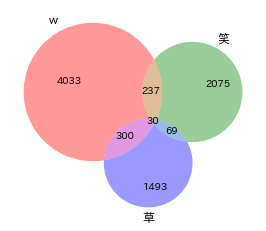

In [36]:
venn3(subsets=df.user_id.to_list()[1:], set_labels=('w', '笑', '草'))
plt.show()

2回以上コメントしたユーザに限定した場合。

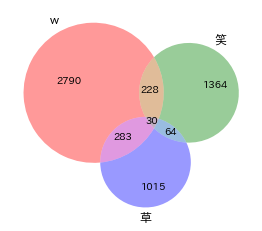

In [47]:
df = df_all_detailed.loc[lambda df: df.duplicated(subset='user_id', keep=False)][['user_id', 'comment_ending']]\
    .groupby('user_id', as_index=False)\
    .agg(lambda x: np.bitwise_or.reduce(x.values))\
    .groupby('comment_ending')\
    .count()
venn3(subsets=df.user_id.to_list()[1:], set_labels=('w', '笑', '草'))
plt.show()

SPY×FAMILY
表現なし：12294 人


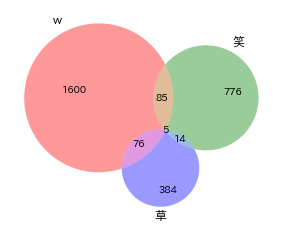

タコピーの原罪
表現なし：39334 人


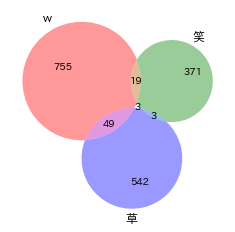

ダンダダン
表現なし：15068 人


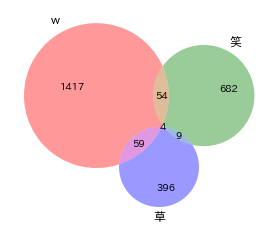

左ききのエレン
表現なし：4047 人


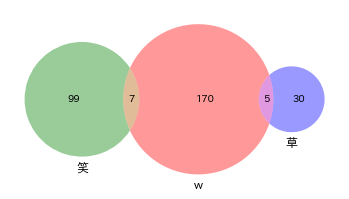

怪獣８号
表現なし：17164 人


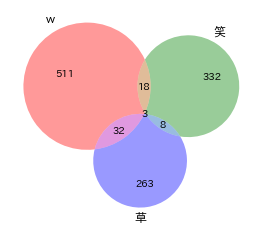

阿波連さんははかれない
表現なし：2133 人


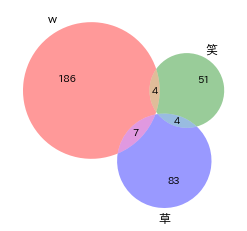

鴨乃橋ロンの禁断推理
表現なし：1553 人


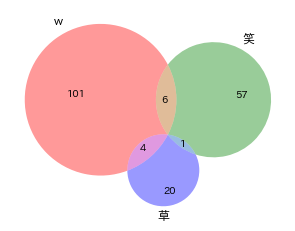

In [37]:
for name, df_1work in df_all_detailed.groupby('work_name'):
    print(name)

    df = df_1work[['user_id', 'comment_ending']]\
        .groupby('user_id', as_index=False)\
        .agg(lambda x: np.bitwise_or.reduce(x.values))\
        .groupby('comment_ending')\
        .count()

    subsets = df.user_id.to_list() + [0] * 7
    venn3(subsets=subsets[1:8], set_labels=('w', '笑', '草'))
    print(f'表現なし：{subsets[0]} 人')
    plt.show()